# 泰勒级数

## 泰勒级数(Taylor Series)

在前几章的预热之后，读者可能会有这样的疑问，是否任何函数都可以写成友善的多项式形式呢？目前为止，我们介绍的 $e^x,sin(x),cos(x)$ 都有其奇妙的多项式形式。这些多项式形式实际为这些函数在 $x=0$ 处展开的泰勒级数。

下面我们给出函数 $f(x)$ 在 $x=0$ 处展开的泰勒级数的定义：

$$f(x)=f(0)+\frac{f'(0)}{1!}x+\frac{f''(0)}{2!}x^2+\frac{f'''(0)}{3!}x^3+\dots=\sum_{k=0}^{\infty}\frac{f^{(k)}(0)}{k!}x^k$$

其中： $f^{(k)}(0)$ 表示函数 $f$ 的 $k$ 次导函数在点 $x=0$ 处的取值。

我们知道对 $e^x$ 无论计算多少次导数结果都是 $e^x$（前面也推荐读者自己验证过），即：

$exp'(x) = exp''(x) = exp'''(x) = \cdots = exp^{(k)}(x) = exp(x)$

$exp'(0) = exp''(0) = exp'''(0) = \cdots = exp^{(k)}(0) = exp(0) = 1$

因而，依据上面的定义展开有：

$exp(x) = exp(0) + \frac{exp'(0)}{1!}x + \frac{exp''(0)}{2!}x + \frac{exp'''(0)}{3!}x + \cdots$

$\qquad = 1 + \frac{x}{1!} + \frac{x}{2!} + \frac{x}{3!} + \cdots$

$\qquad = \sum_{k=0}^{\infty}\frac{x^k}{k!}$

这样便得到了前面的公式。

类似地，有兴趣的读者可以尝试用泰勒级数的定义来推导一下 $sin(x), cos(x)$ 关于 $x=0$ 处展开的泰勒级数。


## 多项式近似（Polynomial Approximantion）

泰勒级数可以把非常复杂的函数转变成无限项的和的形式。通常，我们可以只计算泰勒级数的前几项之和，便能够获得原函数的局部近似了。在做这样的多项式近似时，我们所计算的项越多，则近似的结果越精确。

下面，在Python中试试吧：

0


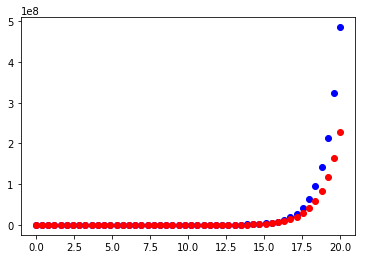

In [3]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

# 指定x为符号
x = sympy.Symbol('x')
# exp为公式
exp = np.e**x
# 下面开始求和，求前20项的和
sums = 0
for i in range(20):
    # 求 i 次导函数
    numerator = exp.diff(x, i)
    #计算导函数在 x=0 处的值
    numerator = numerator.evalf(subs={x:0})
    denominator = np.math.factorial(i)
    sums += numerator / denominator * x**i

# 检验一下原始 exp 函数和其在 x=0 处展开的泰勒级数前 20 项之和的差距
print(exp.evalf(subs={x:0}) - sums.evalf(subs={x:0}))

xvals = np.linspace(0, 20, 50)
for xval in xvals:
    plt.plot(xval, exp.evalf(subs={x:xval}), 'bo',\
             xval, sums.evalf(subs={x:xval}), 'ro')
plt.show()

表明指数函数 $e^x$ 在 $x=0$ 处展开的泰勒级数只取前20项的话，在输入值越接近展开点 $x=0$ 处的近似效果就越好。

让我们看看采用不同项数所计算出来的近似结果之间的差异：

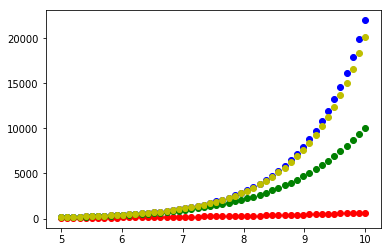

In [15]:
def polyApprox(func, num_terms):
    # 当我们需要反复做类似的步骤的时候，最好将步骤定义为一个函数
    sums = 0
    for i in range(num_terms):
        numerator = func.diff(x, i)
        numerator = numerator.evalf(subs={x:0})
        denominator = np.math.factorial(i)
        sums += numerator / denominator * x**i
    return sums

sum5 = polyApprox(exp, 5)
sum10 = polyApprox(exp, 10)

# 利用 sympy 我们也可以获得泰勒级数：
sum15 = exp.series(x,0,15).removeO()
# sum15 = polyApprox(exp, 15)

xvals = np.linspace(5, 10, 50)
for xval in xvals:
    plt.plot(xval, exp.evalf(subs={x:xval}), 'bo',\
             xval, sum5.evalf(subs={x:xval}), 'ro',\
             xval, sum10.evalf(subs={x:xval}), 'go',\
             xval, sum15.evalf(subs={x:xval}), 'yo')
plt.show()

## 展开点（Expansion point）

上面我们获得的泰勒级数都是围绕着 $x=0$ 处获得的，我们发现多项式近似也只在 $x=0$ 处较为准确。如果我们希望在其他位置获得类似的多项式近似，则可以在不同的展开点（例如 $x=a$ ）获得泰勒级数：

$$f(x) = f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \cdots = \sum_{k=0}^{\infty}\frac{f^{(k)}(a)}{k!}(x-a)^k$$

Python中，这也非常容易：

In [16]:
def taylorExpansion(func, var, expPoint, numTerms):
    return func.series(var, expPoint, numTerms)

print(taylorExpansion(sympy.tanh(x), x, 2, 3))

tanh(2) + (x - 2)*(-tanh(2)**2 + 1) + (x - 2)**2*(-tanh(2) + tanh(2)**3) + O((x - 2)**3, (x, 2))
